# Dataset B – Wine Quality
## Exploratory Data Analysis (EDA)

We want to understand the structure, target distribution, and key properties of the Wine Quality dataset in order to formulate hypothesis-driven expectations about algorithmic performance.

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

SEED = 49
np.random.seed(SEED)
random.seed(SEED)

### Data Loading

We load the Wine Quality dataset and inspect its basic structure.

In [3]:
DATA_PATH = "../wine.csv"
df = pd.read_csv(DATA_PATH)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,5


The variables quality, class, and type are categorical in nature, despite being encoded as integers. Specifically, quality is an ordinal multi-class target variable, type is a binary categorical feature, and class represents a discrete categorical grouping. All remaining features are continuous numerical physicochemical measurements.

### Dataset Overview

We examine dataset size, feature types, and missing values.

In [4]:
df.shape

(6497, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  class                 6497 non-null   int64  
 12  type                  6497 non-null   int64  
 13  quality               6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


In [6]:
df.isna().sum().sort_values(ascending=False)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
class                   0
type                    0
quality                 0
dtype: int64

### Target Variable Distribution

We analyze class balance to motivate metric selection.

In [7]:
target_col = "quality"
df[target_col].value_counts()

4    2251
5    1561
3    1467
6     813
7     204
2     163
1      20
8      18
Name: quality, dtype: int64

In [8]:
df[target_col].value_counts(normalize=True)

4    0.346468
5    0.240265
3    0.225797
6    0.125135
7    0.031399
2    0.025089
1    0.003078
8    0.002771
Name: quality, dtype: float64

### Attributes Distribution

We analyze them to see if they can really add value to the analysis

In [9]:
numeric_cols = df.drop(columns=["quality", "class", "type"]).columns

df[numeric_cols].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [10]:
for col in ["type"]:
    print(f"\n=== {col.upper()} ===")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))


=== TYPE ===
1    4898
0    1599
Name: type, dtype: int64
1    0.753886
0    0.246114
Name: type, dtype: float64


### Initial Observations

- The Wine Quality dataset contains 6497 observations and 14 features, with no missing values.
- All explanatory variables are numerical physicochemical measurements, resulting in a homogeneous
  and low-sparsity feature space.
- Feature distributions exhibit heterogeneous scales and the presence of extreme values,
  motivating feature normalization prior to distance-based or gradient-based learning.
- The target variable (wine quality) is an ordinal multi-class variable with strong class imbalance,
  as most observations are concentrated in quality levels 3–5, while extreme quality levels are rare.
- The binary categorical feature type introduces a clear structural separation between wine groups
  without increasing dimensionality.


### Preliminary Hypothesis

Based on the numerical nature of the features, scale heterogeneity, and class imbalance, we hypothesize that:

- Distance-based methods (kNN) will perform competitively after proper feature scaling, as the
  feature space is continuous and moderately low-dimensional.
- Linear models may underperform due to non-linear relationships between physicochemical attributes
  and wine quality.
- Tree-based models are expected to effectively capture non-linear interactions between attributes,
  but may overfit minority quality classes without sufficient regularization.


## Experiments

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

X = df.drop(columns=["quality", "class"])
y = df["quality"]

num_cols = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'density', 'sulphates', 'alcohol']
cat_cols = ["type"]

preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

preprocessor_knn = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_cols),
    ],
    remainder="drop"
)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)


### Decision Tree

Best params: {'clf__max_depth': 16}
Test Accuracy: 0.6015384615384616
Test Macro-F1: 0.41162523996795974


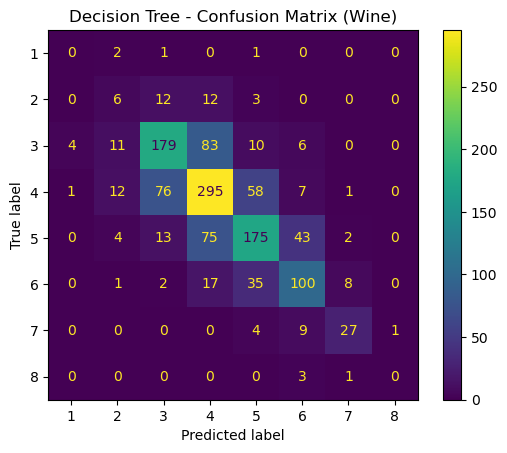

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Scorer multiclase (macro-F1)
f1_macro = make_scorer(f1_score, average="macro")

dt_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=SEED))
])

param_grid = {
    "clf__max_depth": [2, 4, 6, 8, 12, 16, 20, 24, None]
}

dt_grid = GridSearchCV(
    dt_pipe,
    param_grid,
    scoring=f1_macro,
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

dt_best = dt_grid.best_estimator_
y_pred = dt_best.predict(X_test)

print("Best params:", dt_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Macro-F1:", f1_score(y_test, y_pred, average="macro"))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(values_format="d")
plt.title("Decision Tree - Confusion Matrix (Wine)")
plt.show()



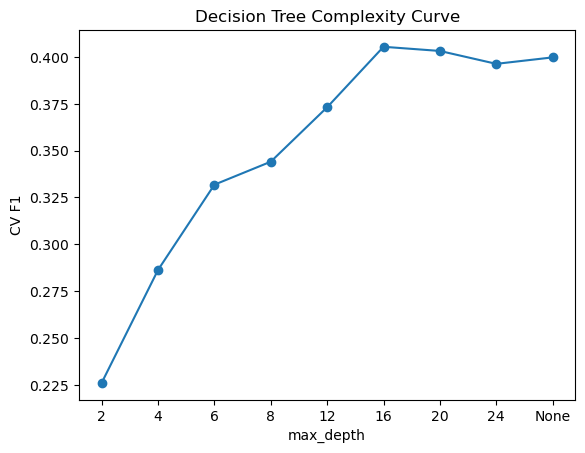

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dt_results = pd.DataFrame(dt_grid.cv_results_)

plt.figure()
plt.plot(
    dt_results["param_clf__max_depth"].astype(str),
    dt_results["mean_test_score"],
    marker="o"
)
plt.xlabel("max_depth")
plt.ylabel("CV F1")
plt.title("Decision Tree Complexity Curve")
plt.show()


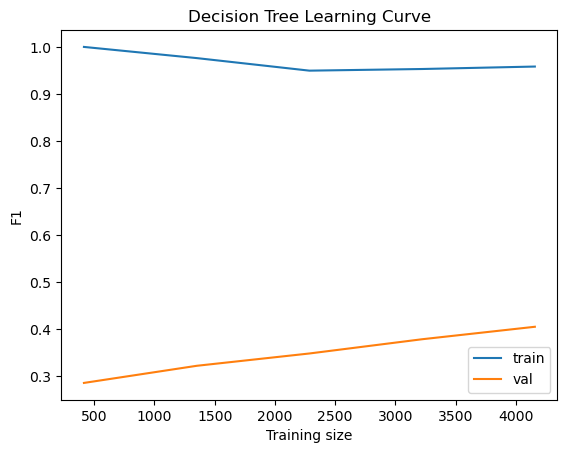

In [15]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    dt_best,
    X_train,
    y_train,
    cv=5,
    scoring=f1_macro,
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, val_scores.mean(axis=1), label="val")
plt.xlabel("Training size")
plt.ylabel("F1")
plt.legend()
plt.title("Decision Tree Learning Curve")
plt.show()

### k-NN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score

f1_macro = make_scorer(f1_score, average="macro")

knn_pipe = Pipeline([
    ("prep", preprocessor_knn),   
    ("clf", KNeighborsClassifier())
])

param_grid = {
    "clf__n_neighbors": [3, 5, 7, 9, 11, 13, 15, 25, 50],
    "clf__weights": ["uniform", "distance"], 
    "clf__metric": ["minkowski"]             
}

knn_grid = GridSearchCV(
    knn_pipe,
    param_grid,
    scoring=f1_macro,
    cv=5,
    n_jobs=-1,
    error_score="raise"
)

knn_grid.fit(X_train, y_train)

knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

print("Best params:", knn_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Test Macro-F1:", f1_score(y_test, y_pred_knn, average="macro"))


Best params: {'clf__metric': 'minkowski', 'clf__n_neighbors': 9, 'clf__weights': 'distance'}
Test Accuracy: 0.6684615384615384
Test Macro-F1: 0.4470183965682026


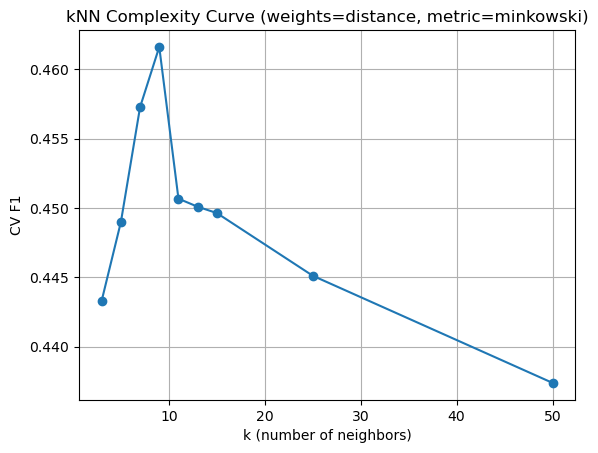

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

knn_results = pd.DataFrame(knn_grid.cv_results_)

best_w = knn_grid.best_params_["clf__weights"]
best_m = knn_grid.best_params_["clf__metric"]

f = knn_results[
    (knn_results["param_clf__weights"] == best_w) &
    (knn_results["param_clf__metric"] == best_m)
].copy()

plt.figure()
plt.plot(f["param_clf__n_neighbors"].astype(int), f["mean_test_score"], marker="o")
plt.xlabel("k (number of neighbors)")
plt.ylabel("CV F1")
plt.title(f"kNN Complexity Curve (weights={best_w}, metric={best_m})")
plt.grid(True)
plt.show()


### SVM - Linear

In [18]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score

f1_macro = make_scorer(f1_score, average="macro")

svm_lin_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", LinearSVC(random_state=SEED, max_iter=300000, tol=1e-3))
])

param_grid = {"clf__C": [0.01, 0.1, 1, 10]}

svm_lin_grid = GridSearchCV(
    svm_lin_pipe, param_grid, scoring=f1_macro, cv=5, n_jobs=-1, error_score="raise"
)
svm_lin_grid.fit(X_train, y_train)

y_pred = svm_lin_grid.best_estimator_.predict(X_test)
print("Best params (Linear, no weight):", svm_lin_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Macro-F1:", f1_score(y_test, y_pred, average="macro"))


Best params (Linear, no weight): {'clf__C': 10}
Test Accuracy: 0.5015384615384615
Test Macro-F1: 0.2402639263308965


### SVM - RBF

Kernelized SVMs with RBF kernels incur quadratic-to-cubic training complexity with respect to the number of training examples, which makes full cross-validation on the complete Adult dataset computationally prohibitive. To enable tractable hyperparameter tuning while preserving evaluation integrity, we perform model selection for the RBF kernel on a stratified subset (40%) of the training data only. All final evaluations are conducted on a shared held-out test set, ensuring fair comparison across models. 

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Stratified subsample ONLY of the training
SUBSAMPLE_FRAC = 0.4 

sss = StratifiedShuffleSplit(
    n_splits=1,
    test_size=1 - SUBSAMPLE_FRAC,
    random_state=SEED
)

idx_small, _ = next(sss.split(X_train, y_train))
X_train_small = X_train.iloc[idx_small]
y_train_small = y_train.iloc[idx_small]

print(f"Train full: {len(X_train)} | Train RBF subset: {len(X_train_small)}")

svm_rbf_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", SVC(kernel="rbf"))
])


param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ["scale", 0.01, 0.1],
    "clf__class_weight": [None, "balanced"]  
}


f1_macro = make_scorer(f1_score, average="macro")

svm_rbf_grid = GridSearchCV(
    svm_rbf_pipe,
    param_grid,
    scoring=f1_macro,
    cv=5,         
    n_jobs=-1,
    error_score="raise"
)

svm_rbf_grid.fit(X_train_small, y_train_small)

svm_rbf_best = svm_rbf_grid.best_estimator_
y_pred_svm = svm_rbf_best.predict(X_test)

print("Best params (RBF):", svm_rbf_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Test Macro-F1:", f1_score(y_test, y_pred_svm, average="macro"))


Train full: 5197 | Train RBF subset: 2078
Best params (RBF): {'clf__C': 10, 'clf__class_weight': None, 'clf__gamma': 0.1}
Test Accuracy: 0.5523076923076923
Test Macro-F1: 0.37453204731529854


### Neural Network

#### sklearn MLPClassifier

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score

f1_macro = make_scorer(f1_score, average="macro")

mlp_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", MLPClassifier(
        solver="sgd",
        random_state=SEED,
        max_iter=300,          
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.1
    ))
])

param_grid = {
    "clf__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "clf__alpha": [1e-4, 1e-3],
    "clf__learning_rate_init": [0.01, 0.1],
    "clf__batch_size": [64, 128]   
}

mlp_grid = GridSearchCV(
    mlp_pipe,
    param_grid,
    scoring=f1_macro,
    cv=5,
    n_jobs=-1,
    error_score="raise"
)

mlp_grid.fit(X_train, y_train)

mlp_best = mlp_grid.best_estimator_
y_pred_mlp = mlp_best.predict(X_test)

print("Best params (MLP):", mlp_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Test Macro-F1:", f1_score(y_test, y_pred_mlp, average="macro"))


Best params (MLP): {'clf__alpha': 0.001, 'clf__batch_size': 64, 'clf__hidden_layer_sizes': (100,), 'clf__learning_rate_init': 0.1}
Test Accuracy: 0.553076923076923
Test Macro-F1: 0.3399305472785879


#### PyTorch + SVD

In [21]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score
import gc

gc.collect()
torch.manual_seed(SEED)
np.random.seed(SEED)


X_nn_sp = preprocessor.fit_transform(X_train)
X_test_sp = preprocessor.transform(X_test)


X_nn = X_nn_sp.astype(np.float32)
X_test_nn = X_test_sp.astype(np.float32)


classes = np.sort(y_train.unique())        
class_to_idx = {c: i for i, c in enumerate(classes)}

y_nn = y_train.map(class_to_idx).values.astype(np.int64)
y_test_nn = y_test.map(class_to_idx).values.astype(np.int64)

n_classes = len(classes)

BATCH_SIZE = 64

train_ds = TensorDataset(
    torch.from_numpy(X_nn),
    torch.from_numpy(y_nn)
)
test_ds = TensorDataset(
    torch.from_numpy(X_test_nn),
    torch.from_numpy(y_test_nn)
)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

class MLP(nn.Module):
    def __init__(self, d, n_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d, 64),
            nn.ReLU(),
            nn.Linear(64, n_classes)
        )
    def forward(self, x):
        return self.net(x)

model = MLP(X_nn.shape[1], n_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-3)  # SGD only

EPOCHS = 15
for epoch in range(EPOCHS):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()

model.eval()
preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        preds.append(torch.argmax(model(xb), dim=1).numpy())

y_pred_nn = np.concatenate(preds)

print("\nPyTorch MLP Results (Wine)")
print("Accuracy:", accuracy_score(y_test_nn, y_pred_nn))
print("Macro-F1:", f1_score(y_test_nn, y_pred_nn, average="macro"))

2026-02-07 21:25:39.373213: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



PyTorch MLP Results (Wine)
Accuracy: 0.546923076923077
Macro-F1: 0.33081909988857194


In [22]:
import pandas as pd

wine_results = pd.DataFrame({
    "Model": [
        "kNN",
        "Decision Tree",
        "SVM RBF",
        "MLP (sklearn)",
        "MLP (PyTorch)",
        "SVM Linear"
    ],
    "Accuracy": [
        0.6684615384615384,
        0.6015384615384616,
        0.5523076923076923,
        0.553076923076923,
        0.546923076923077,
        0.5015384615384615
    ],
    "Macro-F1": [
        0.4470183965682026,
        0.41162523996795974,
        0.37453204731529854,
        0.3399305472785879,
        0.33081909988857194,
        0.2402639263308965
    ]
})

wine_results_sorted = wine_results.sort_values("Macro-F1", ascending=False)

wine_results_sorted

,Model,Accuracy,Macro-F1
0,kNN,0.668462,0.447018
1,Decision Tree,0.601538,0.411625
2,SVM RBF,0.552308,0.374532
3,MLP (sklearn),0.553077,0.339931
4,MLP (PyTorch),0.546923,0.330819
5,SVM Linear,0.501538,0.240264
